In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib as mpl

In [78]:
scena_A_result = pd.read_csv('scena_A_result.csv')
scena_B_result = pd.read_csv('scena_B_result.csv')
london_flows = pd.read_csv('london_flows.csv')

plot_doc = pd.read_csv('plot.csv')
plot_doc=plot_doc.set_index('station_destination')

In [3]:
scena_A_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   prodsimest4          61413 non-null  float64
 3   flows                61413 non-null  int64  
 4   diff                 61413 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [79]:
scena_A_result['prodsimest4'] = scena_A_result['prodsimest4'].astype('int64')

In [80]:
scena_A_result['diff'] = scena_A_result['diff'].astype('int64')

In [6]:
scena_A_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   station_origin       61413 non-null  object
 1   station_destination  61413 non-null  object
 2   prodsimest4          61413 non-null  int64 
 3   flows                61413 non-null  int64 
 4   diff                 61413 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [81]:
scena_B_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   SIM_est_1beta        61413 non-null  float64
 3   SIM_est_2beta        61413 non-null  float64
 4   SIM_est_3beta        61413 non-null  float64
 5   SIM_est_5beta        61413 non-null  float64
 6   flows                61413 non-null  int64  
 7   2beta_diff           61413 non-null  float64
 8   3beta_diff           61413 non-null  float64
 9   5beta_diff           61413 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ MB


In [82]:
scena_B_result[['SIM_est_1beta', 'SIM_est_2beta', 'SIM_est_3beta', 'SIM_est_5beta', '2beta_diff', '3beta_diff', '5beta_diff']] = scena_B_result[['SIM_est_1beta', 'SIM_est_2beta', 'SIM_est_3beta', 'SIM_est_5beta', '2beta_diff', '3beta_diff', '5beta_diff']].astype('int64')

In [28]:
scena_B_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   station_origin       61413 non-null  object
 1   station_destination  61413 non-null  object
 2   SIM_est_1beta        61413 non-null  int64 
 3   SIM_est_2beta        61413 non-null  int64 
 4   SIM_est_3beta        61413 non-null  int64 
 5   SIM_est_5beta        61413 non-null  int64 
 6   flows                61413 non-null  int64 
 7   2beta_diff           61413 non-null  int64 
 8   3beta_diff           61413 non-null  int64 
 9   5beta_diff           61413 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ MB


In [30]:
scena_B_result.rename(columns={'2beta_diff': 'beta2_diff', '3beta_diff': 'beta3_diff', '5beta_diff': 'beta5_diff'}, inplace=True)

In [31]:
scena_B_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   station_origin       61413 non-null  object
 1   station_destination  61413 non-null  object
 2   SIM_est_1beta        61413 non-null  int64 
 3   SIM_est_2beta        61413 non-null  int64 
 4   SIM_est_3beta        61413 non-null  int64 
 5   SIM_est_5beta        61413 non-null  int64 
 6   flows                61413 non-null  int64 
 7   beta2_diff           61413 non-null  int64 
 8   beta3_diff           61413 non-null  int64 
 9   beta5_diff           61413 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ MB


In [83]:
G = nx.read_graphml('london.graph')

In [39]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [9]:
G.remove_nodes_from(['Nine Elms','Battersea Power Station'])

In [10]:
plot_doc

,Est_secA,flow_sum,change_secA,Est_secB_2β,Change_secB_2β,Est_secB_3β,Change_secB_3β,Est_secB_5β,Change_secB_5β
station_destination,,,,,,,,,
Abbey Road,411,345,66,343,-2,346,1,343,-2
Acton Central,359,750,-391,750,0,748,-2,750,0
Acton Town,2172,2202,-30,2182,-20,2193,-9,2194,-8
Aldgate,8638,7782,856,7779,-3,7779,-3,7773,-9
Aldgate East,9612,7932,1680,7936,4,7930,-2,7920,-12
...,...,...,...,...,...,...,...,...,...
Wood Street,397,404,-7,401,-3,402,-2,403,-1
Woodford,673,706,-33,700,-6,705,-1,706,0
Woodgrange Park,160,242,-82,240,-2,241,-1,241,-1


In [11]:
# nx.set_node_attributes(G_plot,dict(plot_doc['flow_sum']),'flow_sum')
# nx.set_node_attributes(G_plot,dict(plot_doc['change_secA']),'change_secA')
# nx.set_node_attributes(G_plot,dict(plot_doc['Est_secB_2β']),'Est_secB_2β')
# nx.set_node_attributes(G_plot,dict(plot_doc['Change_secB_2β']),'Change_secB_2β')
# nx.set_node_attributes(G_plot,dict(plot_doc['Est_secA']),'Est_secA')
# nx.set_node_attributes(G_plot,dict(plot_doc['Est_secB_3β']),'Est_secB_3β')
# nx.set_node_attributes(G_plot,dict(plot_doc['Change_secB_3β']),'Change_secB_3β')

In [12]:
# list(G_plot.nodes(data=True))

Origin flows

In [13]:
#create a dictionary to store flows for all edges
flows1 = {(u,v): 0 for u,v in G.edges()}

In [14]:
#calculate shortest paths for all flows and add data to dict
for i, row in london_flows.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows1[(u,v)] += row.flows
        except:
            flows1[(v,u)] += row.flows

In [15]:
#set this as a network attribute
nx.set_edge_attributes(G, flows1, 'flows1')

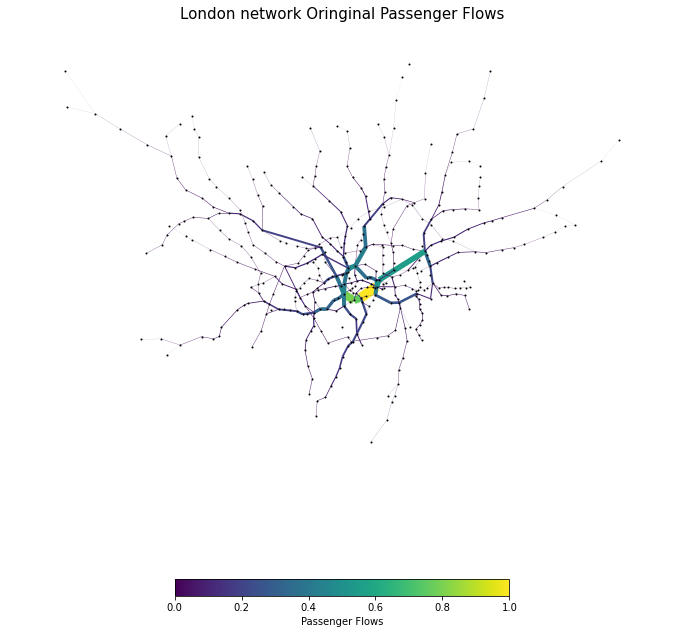

In [16]:
#plot our calcuated flows
flows1_values = flows1.values()
flow1_color=[(i[2]['flows1']/max(flows1_values)) for i in G.edges(data=True)]
flow1_width=[(i[2]['flows1']/max(flows1_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow1_color, width=flow1_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Oringinal Passenger Flows",fontsize=15)

plt.savefig('A_flows.png', dpi=300, bbox_inches='tight')

plt.show()

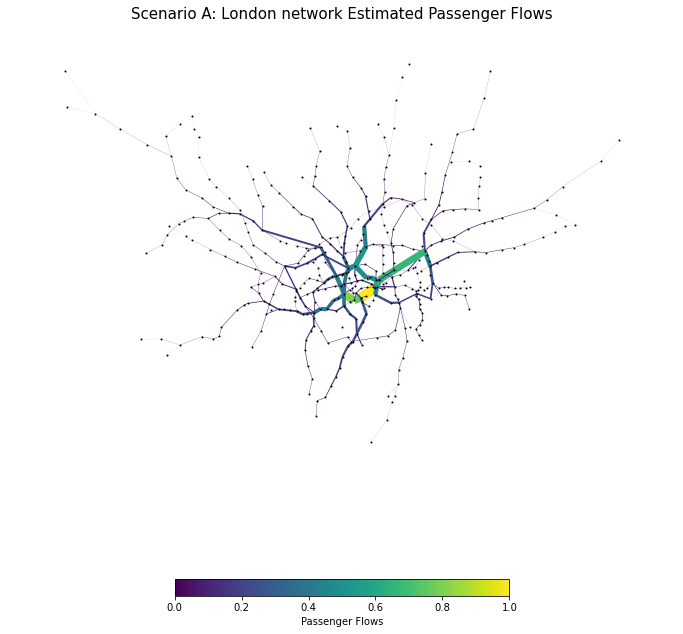

In [19]:
#create a dictionary to store flows for all edges #############################################################################
flows2 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in scena_A_result.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows2[(u,v)] += row.prodsimest4
        except:
            flows2[(v,u)] += row.prodsimest4
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows2, 'flows2')

#plot our calcuated flows #############################################################################
flows2_values = flows2.values()
flow2_color=[(i[2]['flows2']/max(flows2_values)) for i in G.edges(data=True)]
flow2_width=[(i[2]['flows2']/max(flows2_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow2_color, width=flow2_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario A: London network Estimated Passenger Flows",fontsize=15)

plt.savefig('A_flows_est.png', dpi=300, bbox_inches='tight')

plt.show()

In [22]:
test = pd.read_csv('test.csv')

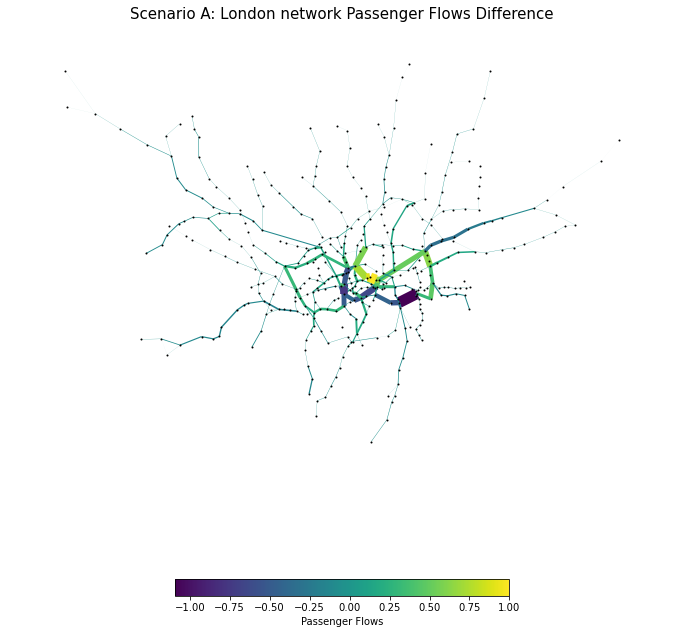

In [32]:
#create a dictionary to store flows for all edges #############################################################################
flows3 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in test.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows3[(u,v)] += row.flows
        except:
            flows3[(v,u)] += row.flows
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows3, 'flows3')

#plot our calcuated flows #############################################################################
flows3_values = flows3.values()
flow3_color=[(i[2]['flows3']/max(flows3_values)) for i in G.edges(data=True)]
flow3_width=[(i[2]['flows3']/max(flows3_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow3_color, width=flow3_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario A: London network Passenger Flows Difference",fontsize=15)

plt.savefig('A_flows_diff.png', dpi=300, bbox_inches='tight')

plt.show()

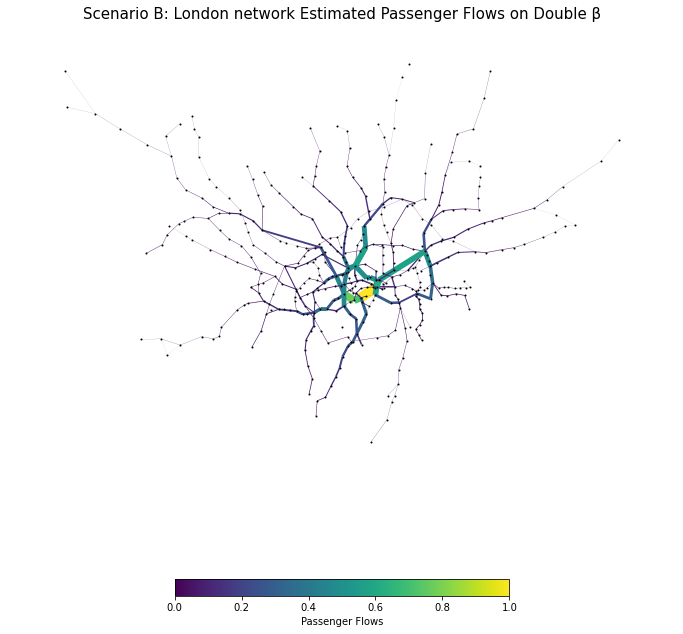

In [29]:
#create a dictionary to store flows for all edges #############################################################################
flows4 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in scena_B_result.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows4[(u,v)] += row.SIM_est_2beta
        except:
            flows4[(v,u)] += row.SIM_est_2beta
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows4, 'flows4')

#plot our calcuated flows #############################################################################
flows4_values = flows4.values()
flow3_color=[(i[2]['flows4']/max(flows4_values)) for i in G.edges(data=True)]
flow3_width=[(i[2]['flows4']/max(flows4_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow3_color, width=flow3_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B: London network Estimated Passenger Flows on Double β",fontsize=15)

plt.savefig('B_flows_2β.png', dpi=300, bbox_inches='tight')

plt.show()

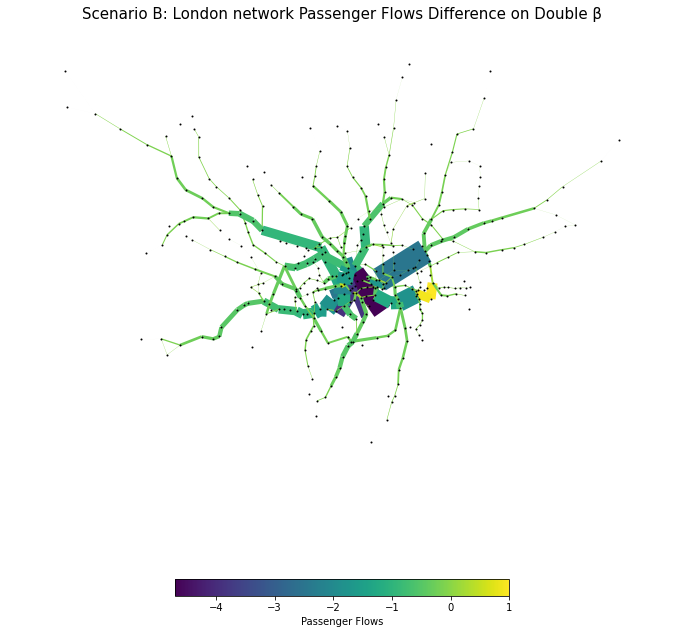

In [33]:
#create a dictionary to store flows for all edges #############################################################################
flows5 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in scena_B_result.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows5[(u,v)] += row.beta2_diff
        except:
            flows5[(v,u)] += row.beta2_diff
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows5, 'flows5')

#plot our calcuated flows #############################################################################
flows5_values = flows5.values()
flow3_color=[(i[2]['flows5']/max(flows5_values)) for i in G.edges(data=True)]
flow3_width=[(i[2]['flows5']/max(flows5_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow3_color, width=flow3_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B: London network Passenger Flows Difference on Double β",fontsize=15)

plt.savefig('B_flows_2β_diff.png', dpi=300, bbox_inches='tight')

plt.show()

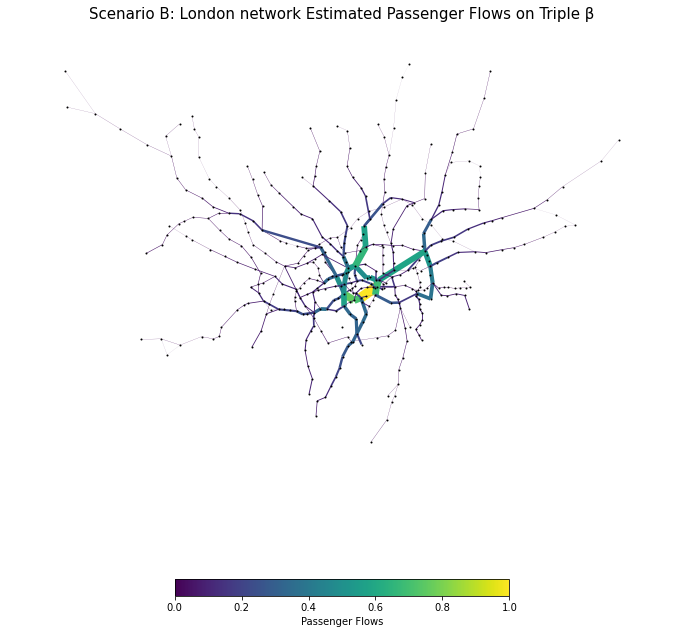

In [34]:
#create a dictionary to store flows for all edges #############################################################################
flows6 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in scena_B_result.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows6[(u,v)] += row.SIM_est_3beta
        except:
            flows6[(v,u)] += row.SIM_est_3beta
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows6, 'flows6')

#plot our calcuated flows #############################################################################
flows6_values = flows6.values()
flow3_color=[(i[2]['flows6']/max(flows6_values)) for i in G.edges(data=True)]
flow3_width=[(i[2]['flows6']/max(flows6_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow3_color, width=flow3_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B: London network Estimated Passenger Flows on Triple β",fontsize=15)

plt.savefig('B_flows_3β.png', dpi=300, bbox_inches='tight')

plt.show()

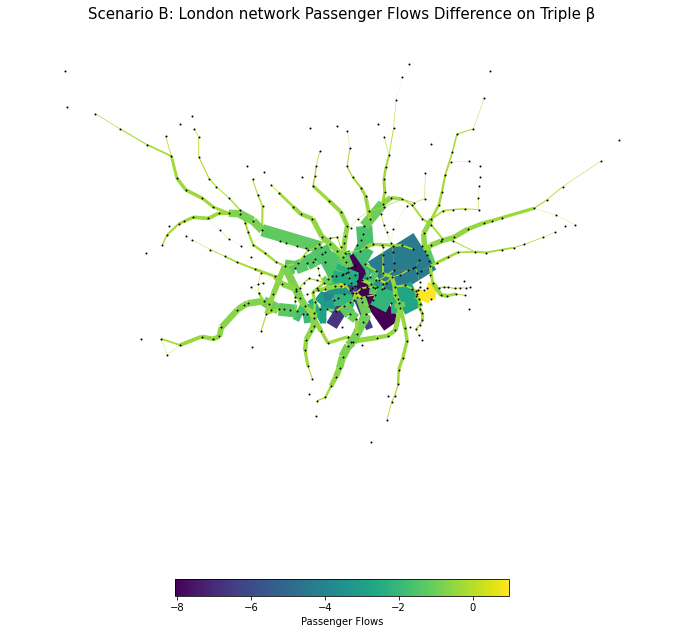

In [36]:
#create a dictionary to store flows for all edges #############################################################################
flows7 = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict #############################################################################
for i, row in scena_B_result.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows7[(u,v)] += row.beta3_diff
        except:
            flows7[(v,u)] += row.beta3_diff
            
#set this as a network attribute #############################################################################
nx.set_edge_attributes(G, flows7, 'flows7')

#plot our calcuated flows #############################################################################
flows7_values = flows7.values()
flow3_color=[(i[2]['flows7']/max(flows7_values)) for i in G.edges(data=True)]
flow3_width=[(i[2]['flows7']/max(flows7_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)

edg=nx.draw_networkx_edges(G, pos,edge_color=flow3_color, width=flow3_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B: London network Passenger Flows Difference on Triple β",fontsize=15)

plt.savefig('B_flows_3β_diff.png', dpi=300, bbox_inches='tight')

plt.show()

In [84]:
GB1 = G.copy()
GB1.remove_edges_from(list(GB1.edges()))
GB1 = nx.MultiGraph(GB1)
for node in GB1.nodes():
    GB1.nodes[node]['coords'] = eval(GB1.nodes[node]['coords'])
for index,row in scena_B_result[scena_B_result['SIM_est_2beta']!=0].iterrows():
    if row['station_origin'] in GB1:
        if row['station_destination'] in GB1:
            GB1.add_edge(row['station_origin'], row['station_destination'], flow=row['flows'])
edge_c = []
for node1, node2, data in GB1.edges(data=True):
    edge_c.append(float(data['flow']))
norm = [float(i)*1000/sum(edge_c) for i in edge_c]

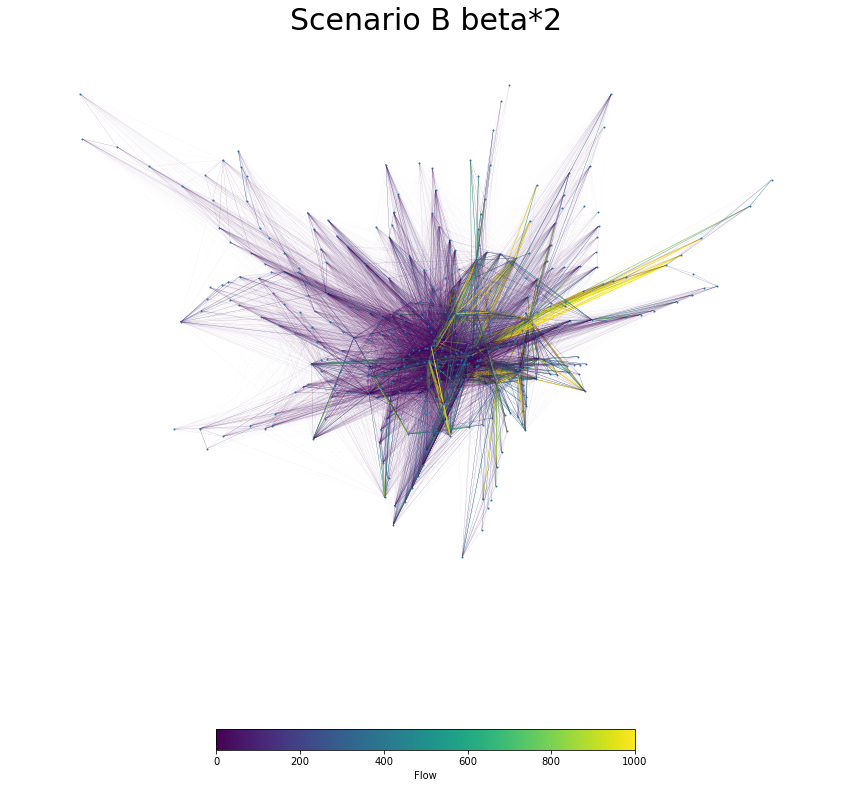

In [86]:
pos = nx.get_node_attributes(GB1 , 'coords')


fig, ax = plt.subplots(figsize=(15,15))
edg = nx.draw_networkx_edges(GB1, pos, edge_color=edge_c, width = norm, edge_cmap = plt.get_cmap('viridis'), edge_vmin = 0, edge_vmax = 1000,alpha = 1)
nx.draw_networkx_nodes(GB1, pos = pos,  node_size = 1)
plt.colorbar(edg, label = "Flow",orientation = "horizontal", shrink = 0.5 )
plt.axis("off")
plt.title("Scenario B beta*2",fontsize = 30)
plt.savefig('B2.png', dpi=100, bbox_inches='tight')
plt.show()

In [87]:
GB2 = G.copy()
GB2.remove_edges_from(list(GB2.edges()))
GB2 = nx.MultiGraph(GB2)
for node in GB2.nodes():
    GB2.nodes[node]['coords'] = eval(GB2.nodes[node]['coords'])
for index,row in scena_B_result[scena_B_result['SIM_est_3beta']!=0].iterrows():
    if row['station_origin'] in GB2:
        if row['station_destination'] in GB2:
            GB2.add_edge(row['station_origin'], row['station_destination'], flow=row['flows'])
edge_c = []
for node1, node2, data in GB2.edges(data=True):
    edge_c.append(float(data['flow']))
norm = [float(i)*1000/sum(edge_c) for i in edge_c]

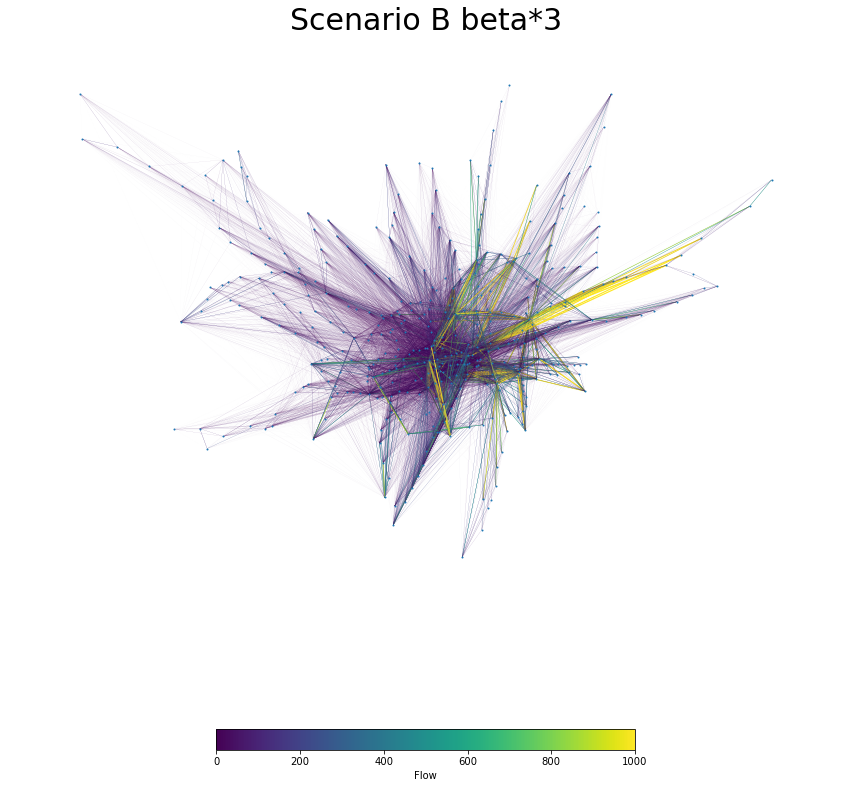

In [88]:
pos2 = nx.get_node_attributes(GB2 , 'coords')

fig, ax = plt.subplots(figsize = (15,15))
edg = nx.draw_networkx_edges(GB2, pos2, edge_color = edge_c, width=norm, edge_cmap=plt.get_cmap('viridis'), edge_vmin = 0, edge_vmax = 1000,alpha = 1)
nx.draw_networkx_nodes(GB2, pos = pos2,  node_size = 1)
plt.colorbar(edg, label = "Flow",orientation = "horizontal", shrink = 0.5 )
plt.axis("off")
plt.title("Scenario B beta*3",fontsize = 30)
plt.savefig('B3.png', dpi=100, bbox_inches='tight')
plt.show()

In [89]:
GB3 = G.copy()
GB3.remove_edges_from(list(GB3.edges()))
GB3 = nx.MultiGraph(GB3)
for node in GB3.nodes():
    GB3.nodes[node]['coords'] = eval(GB3.nodes[node]['coords'])
for index,row in scena_B_result[scena_B_result['SIM_est_5beta']!=0].iterrows():
    if row['station_origin'] in GB3:
        if row['station_destination'] in GB3:
            GB3.add_edge(row['station_origin'], row['station_destination'], flow=row['flows'])
edge_c = []
for node1, node2, data in GB3.edges(data=True):
    edge_c.append(float(data['flow']))
norm = [float(i)*1000/sum(edge_c) for i in edge_c]

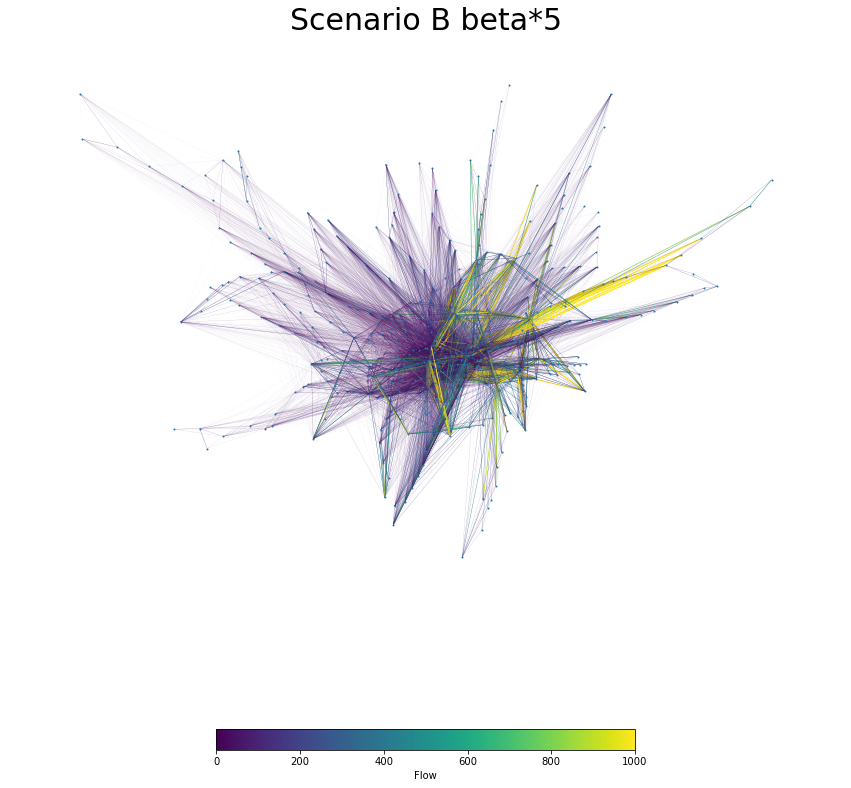

In [90]:
pos2 = nx.get_node_attributes(GB3 , 'coords')

fig, ax = plt.subplots(figsize = (15,15))
edg = nx.draw_networkx_edges(GB3, pos2, edge_color = edge_c, width=norm, edge_cmap=plt.get_cmap('viridis'), edge_vmin = 0, edge_vmax = 1000,alpha = 1)
nx.draw_networkx_nodes(GB3, pos = pos2,  node_size = 1)
plt.colorbar(edg, label = "Flow",orientation = "horizontal", shrink = 0.5 )
plt.axis("off")
plt.title("Scenario B beta*5",fontsize = 30)
plt.savefig('B5.png', dpi=100, bbox_inches='tight')
plt.show()

In [93]:
GB4 = G.copy()
GB4.remove_edges_from(list(GB4.edges()))
GB4 = nx.MultiGraph(GB4)
for node in GB4.nodes():
    GB4.nodes[node]['coords'] = eval(GB4.nodes[node]['coords'])
for index,row in scena_A_result[scena_A_result['prodsimest4']!=0].iterrows():
    if row['station_origin'] in GB4:
        if row['station_destination'] in GB4:
            GB4.add_edge(row['station_origin'], row['station_destination'], flow=row['flows'])
edge_c = []
for node1, node2, data in GB4.edges(data=True):
    edge_c.append(float(data['flow']))
norm = [float(i)*1000/sum(edge_c) for i in edge_c]

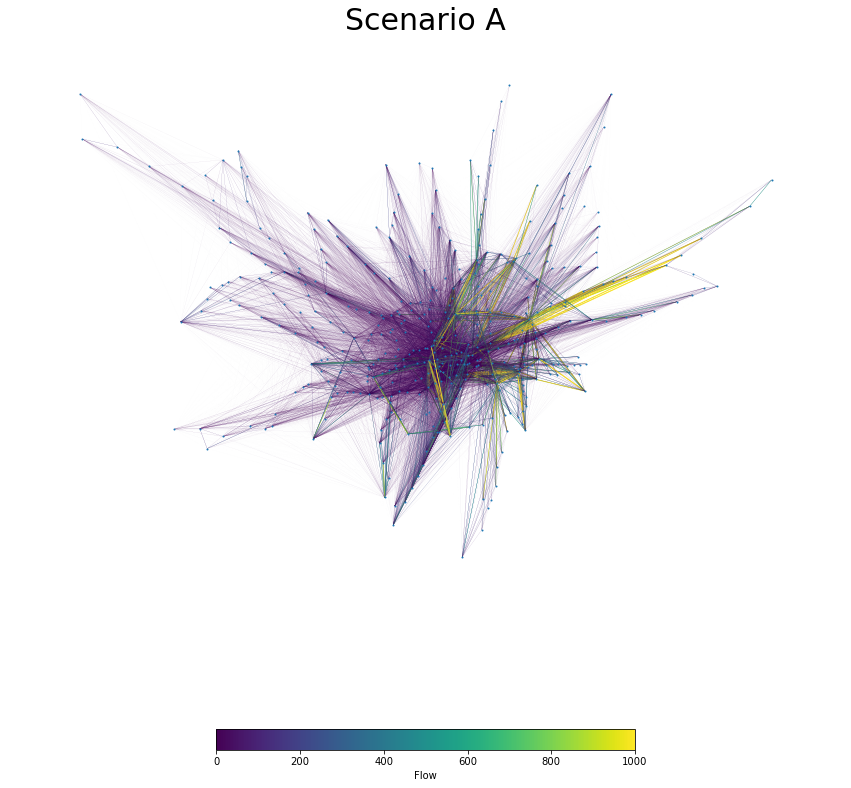

In [94]:
pos2 = nx.get_node_attributes(GB4 , 'coords')

fig, ax = plt.subplots(figsize = (15,15))
edg = nx.draw_networkx_edges(GB4, pos2, edge_color = edge_c, width=norm, edge_cmap=plt.get_cmap('viridis'), edge_vmin = 0, edge_vmax = 1000,alpha = 1)
nx.draw_networkx_nodes(GB4, pos = pos2,  node_size = 1)
plt.colorbar(edg, label = "Flow",orientation = "horizontal", shrink = 0.5 )
plt.axis("off")
plt.title("Scenario A",fontsize = 30)
plt.savefig('Aest.png', dpi=100, bbox_inches='tight')
plt.show()

In [95]:
GB5 = G.copy()
GB5.remove_edges_from(list(GB5.edges()))
GB5 = nx.MultiGraph(GB5)
for node in GB5.nodes():
    GB5.nodes[node]['coords'] = eval(GB5.nodes[node]['coords'])
for index,row in scena_A_result[scena_A_result['flows']!=0].iterrows():
    if row['station_origin'] in GB5:
        if row['station_destination'] in GB5:
            GB5.add_edge(row['station_origin'], row['station_destination'], flow=row['flows'])
edge_c = []
for node1, node2, data in GB5.edges(data=True):
    edge_c.append(float(data['flow']))
norm = [float(i)*1000/sum(edge_c) for i in edge_c]

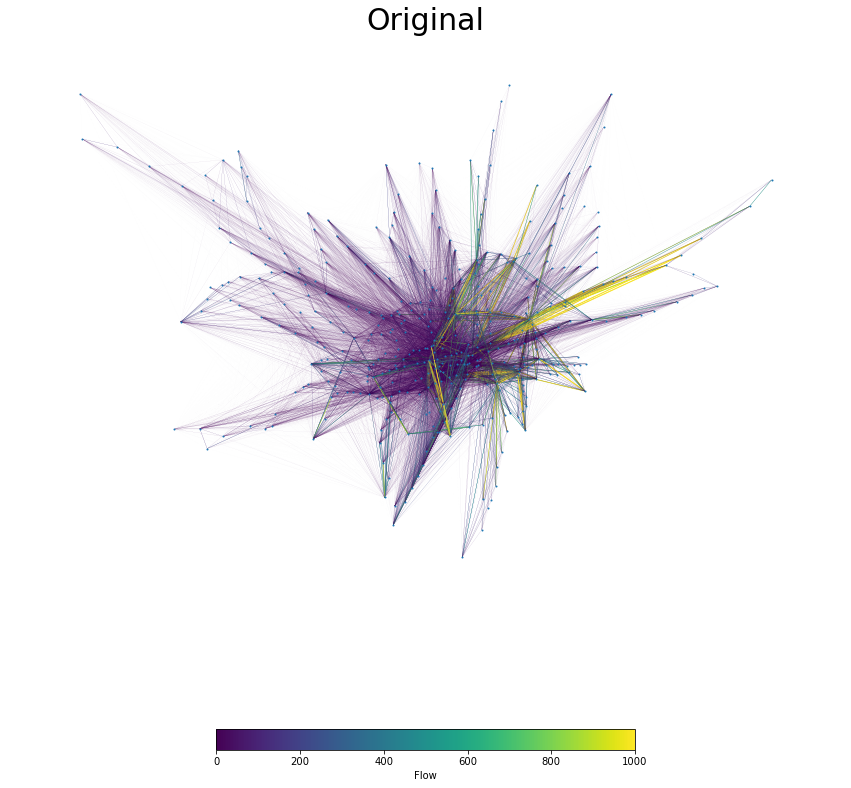

In [96]:
pos2 = nx.get_node_attributes(GB5 , 'coords')

fig, ax = plt.subplots(figsize = (15,15))
edg = nx.draw_networkx_edges(GB5, pos2, edge_color = edge_c, width=norm, edge_cmap=plt.get_cmap('viridis'), edge_vmin = 0, edge_vmax = 1000,alpha = 1)
nx.draw_networkx_nodes(GB5, pos = pos2,  node_size = 1)
plt.colorbar(edg, label = "Flow",orientation = "horizontal", shrink = 0.5 )
plt.axis("off")
plt.title("Original",fontsize = 30)
plt.savefig('Ori.png', dpi=100, bbox_inches='tight')
plt.show()